![PANGAEA_Banner.png](https://github.com/pangaea-data-publisher/community-workshop-material/raw/master/banner.png)

# **pangaeapy practical**
## **How to search and download data from PANGAEA**

Version: 0.1.1<br>
By: Kathrin Riemann-Campe and Michael Oellermann<br>
Last updated: 2024-05-03

This notebook will guide you how to retrieve diverse earth- and environmental data and its metadata from the [PANGAEA data repository](https://www.pangaea.de) using Python. It uses the [PangaeaPy package](https://pypi.org/project/pangaeapy/), to facilitate the data download.

Run this notebook in:
* [GoogleColab](https://colab.research.google.com/github/pangaea-data-publisher/community-workshop-material/blob/master/Python/PANGAEApy_practical/PANGAEApy_practical.ipynb): <a target="_blank" href="https://colab.research.google.com/github/pangaea-data-publisher/community-workshop-material/blob/master/Python/PANGAEApy_practical/pangaeapy_practical.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Content of this notebook
1. Import libraries
2. Query for data in PANGAEA
3. Get metadata
4. Download datasets
5. Download binary files

# 1. Import libraries

In [ ]:
### general libraries
import os
import pandas as pd
import numpy as np
import requests 
from urllib.request import urlopen, urlretrieve

In [ ]:
### plotting
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
### PANGAEApy
## if you need to install PANGAEApy use pip
!pip install pangaeapy # comment to not install pangaeapy

## if you need to upgrade PANGAEApy use 
#!pip install pangaeapy --upgrade # Uncomment to upgrade pangaeapy

## check version of PANGAEApy
#!pip show pangaeapy

## for details see https://pypi.org/project/pangaeapy/ 

import pangaeapy as pan
from pangaeapy.pandataset import PanDataSet

to call the PANGAEApy documentation uncomment one of the following lines

In [ ]:
#help(pan)
### or 
#help(pan.panquery)
### or
#help(pan.pandataset)

In [ ]:
# ignore warnings in this script
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Query for data in PANGAEA

AIM: What data can I find for a particular topic such as a species, location or author?

This mirrors the query via the [PANGAEA website](https://pangaea.de/)  

**Note:** The search term is enclosed with single quotes '. If your search term includes a blank, use additional double quotes " inside the single quotes.  
Example: _'sea ice'_ vs. _'"sea ice"'_  
Example: _'parameter:Temperature, water method:CTD/Rosette'_ vs. _'parameter:"Temperature, water" method:CTD/Rosette'_

## 2.1 Simple query
Note:
* limit = the maximum number of datasets to be returned from query is 500.
    * default limit = 10
    * To download > 500 use the offset attribute e.g. pan.PanQuery("Triticum", limit = 500, offset=500)
* type: 
    * collection = dataset collection
    * member = individual dataset which can be part of a dataset collection 
* score: Indicates how well the dataset matched the query term

In [ ]:
# query database for "Triticum"
query = pan.PanQuery('Triticum')
print(f'There are {query.totalcount} query results.')

# save query as dataframe
query_results = pd.DataFrame(query.result)
print(f'Total length of data frame query_results is {len(query_results)}.')

In [ ]:
query_results

## 2.2 More complex queries

[More information](https://wiki.pangaea.de/wiki/PANGAEA_search) how to query with keywords


#### Multiple query terms

In [ ]:
# find datasets that contain both "marine" and "geology"
query = pan.PanQuery('marine geology')
print(f'There are {query.totalcount} query results.')

#### Optional query terms

In [ ]:
# find datasets that contain "Globigerina" and either "falconensis" or "bulloides" 
query = pan.PanQuery('Globigerina AND (falconensis OR bulloides)')
print(f'There are {query.totalcount} query results.')

#### Uncertain spelling

In [ ]:
# find datasets with uncertain spelling of single letter
query = pan.PanQuery('Gl?bigerina')
print(f'There are {query.totalcount} query results.')

In [ ]:
# finds datasets with "Neogloboquadrina" regardless of your spelling mistake
query = pan.PanQuery('~Neogloboqadrina')
print(f'There are {query.totalcount} query results.') 

#### Specific author

In [ ]:
# find datasets of author "Herzschuh"


#### Within geolocation

In [ ]:
# query database for "Globigerina bulloides" within a certain geolocation aka bounding box
# bounding box: bbox=(minlon, minlat,  maxlon, maxlat)
query = pan.PanQuery('Globigerina bulloides', limit = 500, bbox=(17.7, 67.7, 21, 69))
print(f'There are {query.totalcount} query results.')

## 2.3 Queries exceeding 500 results

### How to query PANGAEA without result limitations
* The maximum of retrieving search results is 500 datasets.  
* Retrieve datasets in chunks of 500 via offset option.  
* Put all datasets in one data frame.

In [ ]:
# query database for project "PAGES_C-PEAT" 
query = pan.PanQuery('project:label:PAGES_C-PEAT', limit = 500)
print(f'There are {query.totalcount} query results.')
print(f'Currently query consists of {len(query.result)} entries.')

In [ ]:
# Get all results and combine them in data frame.

# create empty data frame
df_query_results_all = pd.DataFrame()

# loop over all results in steps of 500
for i in np.arange(0,query.totalcount,500):
    # store result of individual step in qs
    qs = pan.PanQuery('project:label:PAGES_C-PEAT', limit = 500, offset=i)
    # convert qs result with 500 entries to data frame df_qs
    df_qs = pd.DataFrame(qs.result)
    # concatenate all individual df_qs into one data frame named query_results_all
    df_query_results_all = pd.concat([df_query_results_all,df_qs],ignore_index=True)
    
print(f'There are {query.totalcount} query results.')
print(f'df_query_results_all consists of {len(df_query_results_all)} results.')

In [ ]:
# show first 3 lines
df_query_results_all.head(3)

In [ ]:
# show last 3 lines
df_query_results_all.tail(3)

## 2.4. Quiz

[More information](https://wiki.pangaea.de/wiki/PANGAEA_search) how to query with keywords

### 2.4.1 How many datasets contain "Octopus vulgaris"?

In [18]:
# finds datasets with "Octopus vulgaris" regardless of your spelling mistake
query = pan.PanQuery('Octuopus vulgaris')
print(f'There are {query.totalcount} query results.') 

There are 4155 query results.


### 2.4.2 How many datasets contain "sea ice" in the title only?

In [28]:
query = pan.PanQuery('title:sea ice')
print(f'There are {query.totalcount} query results.') 

query_results = pd.DataFrame(query.result)
query_results

There are 11366 query results.


URI      score  \
0  doi:10.1594/PANGAEA.786639  31.739113   
1  doi:10.1594/PANGAEA.841786  31.309504   
2  doi:10.1594/PANGAEA.880357  30.595507   
3  doi:10.1594/PANGAEA.755858  30.559704   
4  doi:10.1594/PANGAEA.934431  29.212198   
5  doi:10.1594/PANGAEA.932594  29.168346   
6  doi:10.1594/PANGAEA.762116  28.882260   
7  doi:10.1594/PANGAEA.855218  28.784145   
8  doi:10.1594/PANGAEA.745969  28.463823   
9  doi:10.1594/PANGAEA.858588  28.051700   

                                                html        type  position  
0  <li><div class="citation"><a href="https://doi...  collection         0  
1  <li><div class="citation"><a href="https://doi...  collection         1  
2  <li><div class="citation"><a href="https://doi...  collection         2  
3  <li><div class="citation"><a href="https://doi...  collection         3  
4  <li><div class="citation"><a href="https://doi...  collection         4  
5  <li><div class="citation"><a href="https://doi...  collection         5  
6  <li><div class="citation"><a href="https://doi...  collection         6  
7  <li><div class="citation"><a href="https://doi...  collection         7  
8  <li><div class="citation"><a href="https://doi...  collection         8  
9  <li><div class="citation"><a href="https://doi...  collection         9

### 2.4.3 How many datasets has the author Antje Boetius published?

In [54]:
pan.PanQuery('Author:~Kerch').result

[{'URI': 'doi:10.1594/PANGAEA.888026',
  'score': 30.786205,
  'html': '<li><div class="citation"><a href="https://doi.pangaea.de/10.1594/PANGAEA.888026" target="_self" class="dataset-link"><strong>Kerch, J; Hoffmann, H; Bohleber, P (2018):</strong> Large Area Scan Macroscope images of basal ice samples from Kilimanjaro, Tansania (2015)</a></div><table class="result" summary="Dataset reference and size" cellspacing="0" cellpadding="0"><tr><td class="title">Size:</td><td class="content">30 data points</td></tr></table><div class="datasetid"><a href="https://doi.pangaea.de/10.1594/PANGAEA.888026" target="_self" class="dataset-link doi-link">https://doi.org/10.1594/PANGAEA.888026</a> – <span title="The score is a measurement of relevancy (see TF-IDF algorithm). The value is not absolute and only suitable to compare hits from the same result set.">Score: 30.79</span></div></li>',
  'type': 'member',
  'position': 0},
 {'URI': 'doi:10.1594/PANGAEA.885082',
  'score': 30.764101,
  'html': '<

### 2.4.4 How many datasets measured "Temperature, water" using a CTD/Rosette?

In [51]:
pan.PanQuery('parameter:Temperature, water method:CTD/Rosette').result# Your solution

[{'URI': 'doi:10.1594/PANGAEA.657122',
  'score': 22.55641,
  'html': '<li><div class="citation"><a href="https://doi.pangaea.de/10.1594/PANGAEA.657122" target="_self" class="dataset-link"><strong>Wojewodzki, T (2007):</strong> Hydrochemistry measured on water bottle samples during WIECZNO cruise Wieczno86</a></div><table class="result" summary="Dataset reference and size" cellspacing="0" cellpadding="0"><tr><td class="title">Related to:</td><td class="content"><strong>Dybern, BI; Hansen, HP (1989):</strong> Baltic Sea Patchiness Experiment - PEX \'86. Part I. <em>Ices Cooperative Research Report-Rapport des Recherches Collectives</em></td></tr><tr><td class="title">Size:</td><td class="content">3566 data points</td></tr></table><div class="datasetid"><a href="https://doi.pangaea.de/10.1594/PANGAEA.657122" target="_self" class="dataset-link doi-link">https://doi.org/10.1594/PANGAEA.657122</a> – <span title="The score is a measurement of relevancy (see TF-IDF algorithm). The value is no

# 3. Get metadata

A long list of metadata is callable with PanDataSet. 
Find a comprehensive list in internal documentation  
_help(pan.PanQuery)_    

or in this notebook full of examples: [pangaeapy_detailed_metadata_search.ipynb](https://github.com/pangaea-data-publisher/community-workshop-material/tree/master/Python/PANGAEApy_practical/pangaeapy_detailed_metadata_search.ipynb)  

additional example on how to extract project-specific information from PANGAEA datasets: [PANGAEA_access_metadata_per_project.ipynb](https://github.com/pangaea-data-publisher/community-workshop-material/blob/master/Python/PANGAEApy_practical/PANGAEA_access_metadata_per_project.ipynb)

## 3.1 Get metadata of individual dataset

#### Example dataset from PANGAEA https://doi.pangaea.de/10.1594/PANGAEA.923033

In [75]:
# Example dataset from PANGAEA
#ds = PanDataSet('https://doi.pangaea.de/10.1594/PANGAEA.923033', include_data=False) # metadata only
#ds = PanDataSet('doi:10.1594/PANGAEA.923033', include_data=False) # metadata only
ds = PanDataSet(836558) # metadata only
print(ds.data)

                                   Event  \
0     TARA_20130701T0332Z_168_EVENT_CAST   
1     TARA_20130701T0332Z_168_EVENT_CAST   
2     TARA_20130701T0332Z_168_EVENT_CAST   
3     TARA_20130701T0332Z_168_EVENT_CAST   
4     TARA_20130701T0332Z_168_EVENT_CAST   
...                                  ...   
1726  TARA_20130702T0756Z_168_EVENT_CAST   
1727  TARA_20130702T0756Z_168_EVENT_CAST   
1728  TARA_20130702T0756Z_168_EVENT_CAST   
1729  TARA_20130702T0756Z_168_EVENT_CAST   
1730  TARA_20130702T0756Z_168_EVENT_CAST   

                                           Event 2        Campaign    Basis  \
0     [day] [water layer with no specific feature]  TARA_20130629Z  SV Tara   
1     [day] [water layer with no specific feature]  TARA_20130629Z  SV Tara   
2     [day] [water layer with no specific feature]  TARA_20130629Z  SV Tara   
3     [day] [water layer with no specific feature]  TARA_20130629Z  SV Tara   
4     [day] [water layer with no specific feature]  TARA_20130629Z  SV Tara 

### Basic metadata retrieval

In [76]:
# Title
print(f'Title: {ds.title}')
# Abstract
print(f'Abstract: {ds.abstract}')
# Publication date
print(f'Publication date: {ds.date}')
# Authors
print(f'Authors: {"; ".join([x.fullname for x in ds.authors])}')
# Author orcids
print(f'Orcids: {"; ".join([x.ORCID if x.ORCID else "no ORCID" for x in ds.authors])}')
# Citation
print(f'Citation: {ds.citation}')
# doi
print(f'doi: {ds.doi}')
# Geolocation
print(f'Latitude: {ds.geometryextent["meanLatitude"]}')
print(f'Longitude: {ds.geometryextent["meanLongitude"]}')
# Parameters
params = "; ".join([f'{param.name} [{param.unit}]' if param.unit else param.name for param in ds.params.values()])
print(f'Parameters: {params}')
# Event devices
print(f'Event devices: {"; ".join(set([device for device in ds.getEventsAsFrame()["device"]]))}')

Title: Vertical profiles of environmental parameters measured from physical, optical and imaging sensors during station TARA_168 of the Tara Oceans expedition 2009-2013
Abstract: The Tara Oceans Expedition (2009-2013) sampled the world oceans on board a 36 m long schooner, collecting environmental data and organisms from viruses to planktonic metazoans for later analyses using modern sequencing and state-of-the-art imaging technologies. Tara Oceans Data are particularly suited to study the genetic, morphological and functional diversity of plankton. The present data set includes properties of seawater, particulate matter and dissolved matter from physical, optical and imaging sensors mounted on a vertical sampling system (Rosette) used during the 2009-2013 tara Oceans Expedition. It comprised 2 pairs of conductivity and temperature sensors (SEABIRD components), and a complete set of WEtLabs optical sensors, including chrorophyll and CDOM fluorometers, a 25 cm transmissiometer, and a on

### Store metadata in data frame

In [77]:
# create empty data frame
df = pd.DataFrame()

# store metadata in df
df.loc[0,'dataset title'] = ds.title
df.loc[0,'abstract'] = ds.abstract
df.loc[0,'publication date'] = ds.date

# ds.authors is a list
df.loc[0,'first author fullname'] = ds.authors[0].fullname
df.loc[0,'all authors fullnames'] = "; ".join([x.fullname for x in ds.authors])

# authors orcids is a list
df.loc[0,'all authors orcids'] = "; ".join([x.ORCID if x.ORCID else "no ORCID" for x in ds.authors])

df.loc[0,'citation'] = ds.citation
df.loc[0,'dataset DOI'] = ds.doi
df.loc[0,'mean latitude'] = ds.geometryextent["meanLatitude"]
df.loc[0,'mean longitude'] = ds.geometryextent["meanLongitude"]

# parameters is a list
df.loc[0,'parameters'] = "; ".join([f'{param.name} [{param.unit}]' if param.unit else param.name for param in ds.params.values()])

# event devices
df.loc[0,'device'] = "; ".join(set([device for device in ds.getEventsAsFrame()["device"]]))

In [66]:
df

dataset title abstract  \
0  Crystal c-axes (fabric analyser G50) of ice co...     None   

      publication date first author fullname  \
0  2018-04-16T10:35:28        Weikusat, Ilka   

                               all authors fullnames  \
0  Weikusat, Ilka; Eichler, Jan; Kleitz, Ina; Wat...   

                                  all authors orcids  \
0  0000-0002-3023-6036; 0000-0002-3239-9760; no O...   

                                            citation  \
0  Weikusat, Ilka; Eichler, Jan; Kleitz, Ina; Wat...   

                              dataset DOI mean latitude mean longitude  \
0  https://doi.org/10.1594/PANGAEA.888519         75.63         -35.98   

                                          parameters     device  
0  DEPTH, ice/snow [m]; Sample code/label; File n...  Ice drill

### Save dataframe as file

In [78]:
# Create data directory
data_directory = "PANGAEA_data"
# Check if it already exists before creating it
if not os.path.isdir(data_directory):
    os.mkdir(data_directory)
    
# Save as csv (comma seperated value)
df.to_csv(os.path.join(data_directory, f'PANGAEA_megadata_{ds.id}.csv'), encoding='utf-8')
df.to_csv(os.path.join(data_directory, f'PANGAEA_megadata_{ds.id}.txt'), sep='\t', encoding='utf-8', index=False)
print(f'PANGAEA metadata of {ds.id} saved')

PANGAEA metadata of 836558 saved


##### find out more about output formats e.g. excel at https://pandas.pydata.org/pandas-docs/stable/reference/io.html

## 3.2 Getting metadata for multiple datasets

In [80]:
query = pan.PanQuery("location:'canary'", limit=500)
print(f'There are {query.totalcount} query results.')

There are 90 query results.


In [81]:
# store query results in dataframe
df = pd.DataFrame(query.result)

In [92]:
df.all

<bound method DataFrame.all of                            URI      score  \
0   doi:10.1594/PANGAEA.943911  18.922405   
1   doi:10.1594/PANGAEA.943810  18.868248   
2   doi:10.1594/PANGAEA.762202  18.252419   
3   doi:10.1594/PANGAEA.755398  18.099670   
4   doi:10.1594/PANGAEA.943741  17.895346   
..                         ...        ...   
85  doi:10.1594/PANGAEA.859881   4.910152   
86   doi:10.1594/PANGAEA.60140   4.480038   
87  doi:10.1594/PANGAEA.735719   4.248514   
88  doi:10.1594/PANGAEA.733692   0.885951   
89  doi:10.1594/PANGAEA.199835   0.735637   

                                                 html        type  position  \
0   <li><div class="citation"><a href="https://doi...      member         0   
1   <li><div class="citation"><a href="https://doi...      member         1   
2   <li><div class="citation"><a href="https://doi...  collection         2   
3   <li><div class="citation"><a href="https://doi...  collection         3   
4   <li><div class="citation"><a 

#### Loop over all entries in df and get metadata for each entry

NOTE: As a safety precaution, the number of metadata requests is limited for a specific time period. 

_Received too many (metadata) requests error (429)...waiting 30s -_

If you have larger requests, prepare to wait or use a different tool e.g. OAI-PMH (https://wiki.pangaea.de/wiki/OAI-PMH).

In [88]:
for ind,value in df['URI'].items():
    #print(value)
    
    # get metadata 
    ds = PanDataSet(id=value, include_data=False) # just metadata
   
    # store metadata in df in new column
    df.loc[ind,'dataset title'] = ds.title
    df.loc[ind,'abstract'] = ds.abstract
    df.loc[ind,'publication date'] = ds.date

    # ds.authors is a list
    df.loc[ind,'first author fullname'] = ds.authors[0].fullname
    df.loc[ind,'all authors fullnames'] = "; ".join([x.fullname for x in ds.authors])

    # authors orcids is a list
    df.loc[ind,'all authors orcids'] = "; ".join([x.ORCID if x.ORCID else "no ORCID" for x in ds.authors])

    df.loc[ind,'citation'] = ds.citation
    df.loc[ind,'dataset DOI'] = ds.doi
    
    # some datasets contain binaries and no events => ds.geometryextent is empty 
    if bool(ds.geometryextent):
        df.loc[ind,'mean latitude'] = ds.geometryextent["meanLatitude"]
        df.loc[ind,'mean longitude'] = ds.geometryextent["meanLongitude"]

    # parameters is a list
    df.loc[ind,'parameters'] = "; ".join([f'{param.name} [{param.unit}]' if param.unit else param.name for param in ds.params.values()])

    # some older datasets have no events => ds.getEventsAsFrame() is empty 
    if not ds.getEventsAsFrame().empty:
        # event devices
        df.loc[ind,'device'] = "; ".join(set([device if device else "no device" for device in ds.getEventsAsFrame()["device"]]))

Data set is protected - 
Dataset is either restricted or of type "collection" - https://doi.pangaea.de/10.1594/PANGAEA.943911
Data set is protected - 
Dataset is either restricted or of type "collection" - https://doi.pangaea.de/10.1594/PANGAEA.943810
Data set is of type collection, please select one of its child datasets - 
Dataset is either restricted or of type "collection" - https://doi.org/10.1594/PANGAEA.762202
Data set is of type collection, please select one of its child datasets - 
Dataset is either restricted or of type "collection" - https://doi.org/10.1594/PANGAEA.755398
Data set is protected - 
Dataset is either restricted or of type "collection" - https://doi.pangaea.de/10.1594/PANGAEA.943741
Data set is protected - 
Dataset is either restricted or of type "collection" - https://doi.pangaea.de/10.1594/PANGAEA.943742
Data set is of type collection, please select one of its child datasets - 
Dataset is either restricted or of type "collection" - https://doi.org/10.1594/PANG

In [89]:
df.head(2)

URI      score  \
0  doi:10.1594/PANGAEA.943911  18.922405   
1  doi:10.1594/PANGAEA.943810  18.868248   

                                                html    type  position  \
0  <li><div class="citation"><a href="https://doi...  member         0   
1  <li><div class="citation"><a href="https://doi...  member         1   

                                       dataset title abstract  \
0  Term-related species parameter - test import m...     None   
1  Term-related species parameter - test WoRMS & ...     None   

  publication date first author fullname all authors fullnames  \
0             None      Wittmann, Astrid      Wittmann, Astrid   
1             None      Wittmann, Astrid      Wittmann, Astrid   

    all authors orcids                                           citation  \
0  0000-0002-4839-5633  Wittmann, Astrid: Term-related species paramet...   
1  0000-0002-4839-5633  Wittmann, Astrid: Term-related species paramet...   

                                     dataset DOI       mean latitude  \
0  https://doi.pangaea.de/10.1594/PANGAEA.943911  32.245461538461534   
1  https://doi.pangaea.de/10.1594/PANGAEA.943810  32.245461538461534   

        mean longitude                                         parameters  \
0  -19.335076923076997  Event label; Sample ID; Species, unique identi...   
1  -19.335076923076997  Event label; Sample ID; Species, unique identi...   

                                             device  
0  Necropsy after Kuiken and García Hartmann (1991)  
1  Necropsy after Kuiken and García Hartmann (1991)

### Save dataframe as file

In [ ]:
# Create data directory
data_directory = "PANGAEA_data"
# Check if it already exists before creating it
if not os.path.isdir(data_directory):
    os.mkdir(data_directory)
    
# Save as csv (comma seperated value)
df.to_csv(os.path.join(data_directory, f'PANGAEA_metadata_df_all.csv'), encoding='utf-8')
df.to_csv(os.path.join(data_directory, f'PANGAEA_metadata_df_all.txt'), sep='\t', encoding='utf-8', index=False)
print(f'PANGAEA metadata df_all saved')ds = PanDataSet(id=935580, include_data=False)

##### find out more about output formats e.g. excel at https://pandas.pydata.org/pandas-docs/stable/reference/io.html

## 3.3 Quiz

### 3.3.1 What is the title of this dataset?
https://doi.pangaea.de/10.1594/PANGAEA.937210

In [124]:
pan.PanDataSet('https://doi.pangaea.de/10.1594/PANGAEA.937210').title

'In-situ metabolic rates of the coral Platygyra carnosa in Port Island (Hong Kong)'

### 3.3.2 What is the publication date of this dataset?
https://doi.pangaea.de/10.1594/PANGAEA.863967

In [107]:
pan.PanDataSet('https://doi.pangaea.de/10.1594/PANGAEA.863967').date

'2016-08-22T07:34:34'

### 3.3.3 Did they measure temperature in this dataset?
https://doi.pangaea.de/10.1594/PANGAEA.863975

In [153]:
ds = pan.PanDataSet('https://doi.pangaea.de/10.1594/PANGAEA.863975')
#df = pd.DataFrame(ds)
print(ds.parameters)

{'Type': <pangaeapy.pandataset.PanParam object at 0x7326ef970af0>, 'Species': <pangaeapy.pandataset.PanParam object at 0x7326ef970eb0>, 'Reg spec no': <pangaeapy.pandataset.PanParam object at 0x7326ef972d10>, 'URL ref': <pangaeapy.pandataset.PanParam object at 0x7326ef9719c0>, 'Exp': <pangaeapy.pandataset.PanParam object at 0x7326ef971030>, 'Treat': <pangaeapy.pandataset.PanParam object at 0x7326ef971330>, 'Repl': <pangaeapy.pandataset.PanParam object at 0x7326ef972920>, 'rETR max': <pangaeapy.pandataset.PanParam object at 0x7326ef970520>, 'Fv/Fm': <pangaeapy.pandataset.PanParam object at 0x7326ef972770>, 'C/N': <pangaeapy.pandataset.PanParam object at 0x7326ef973be0>, 'δ13C': <pangaeapy.pandataset.PanParam object at 0x7326ef972ad0>, 'RNA/DNA': <pangaeapy.pandataset.PanParam object at 0x7326ef9713f0>, 'RNA': <pangaeapy.pandataset.PanParam object at 0x7326ef971360>, 'DNA': <pangaeapy.pandataset.PanParam object at 0x7326ef972680>, 'PN O2': <pangaeapy.pandataset.PanParam object at 0x7326e

# 4. Download datasets

## 4.1 Download single dataset
* download open access dataset
* apply authentication token

AIM: How can I download a single dataset right into Python or to my harddrive?

### Search for datasets

In [154]:
# query database for "Deep-sea Sponge Microbiome Project" 
query = pan.PanQuery('"Deep-sea Sponge Microbiome Project"', limit = 50)
query_results = pd.DataFrame(query.result)
query_results

URI      score  \
0  doi:10.1594/PANGAEA.923035  135.30621   
1  doi:10.1594/PANGAEA.923033  131.68518   

                                                html    type  position  
0  <li><div class="citation"><a href="https://doi...  member         0  
1  <li><div class="citation"><a href="https://doi...  member         1

### Download dataset from PANGAEA
Example dataset: https://doi.pangaea.de/10.1594/PANGAEA.923033

Using the full url

In [155]:
ds = PanDataSet("https://doi.pangaea.de/10.1594/PANGAEA.923033")
# ds contains data and metadata
# see section below on how to get metadata
print(type(ds))

# ds.data is data frame
print(type(ds.data))

# dataset header contains of parameter short names without unit
ds.data.head(3)

<class 'pangaeapy.pandataset.PanDataSet'>
<class 'pandas.core.frame.DataFrame'>


Event        ID      Project      Access no gen Access no gen_2  \
0  HUD16/19_010  WB-00001  PRJNA613976  insdc:SRR11365522             NaN   
1  HUD16/19_010  WB-00005  PRJNA613976  insdc:SRR11365520             NaN   
2  HUD16/19_010  WB-00007  PRJNA613976  insdc:SRR11365519             NaN   

         Campaign           Date/Time  Latitude  Longitude  Depth water  ...  \
0  Hudson2016-019 2016-07-20 16:30:12   44.3193    -62.605          199  ...   
1  Hudson2016-019 2016-07-20 16:30:12   44.3193    -62.605          199  ...   
2  Hudson2016-019 2016-07-20 16:30:12   44.3193    -62.605          199  ...   

  Samp type Samp type_2                                            URL ref  \
0    sponge   LMA_glass  https://www.marinespecies.org/aphia.php?p=taxd...   
1    sponge   LMA_glass  https://www.marinespecies.org/aphia.php?p=taxd...   
2    sponge   LMA_glass  https://www.marinespecies.org/aphia.php?p=taxd...   

     Phylum           Class          Order       Family    Genus  \
0  Porifera  Hexactinellida  Lyssacinosida  Rossellidae  Vazella   
1  Porifera  Hexactinellida  Lyssacinosida  Rossellidae  Vazella   
2  Porifera  Hexactinellida  Lyssacinosida  Rossellidae  Vazella   

               Species Elevation  
0  Vazella pourtalesii    -200.8  
1  Vazella pourtalesii    -200.8  
2  Vazella pourtalesii    -200.8  

[3 rows x 53 columns]

Using the doi

Using the PANGAEA ID

### Translate to long parameter names
Because by default parameters are abbreviated without units

In [157]:
# Translate short parameters names to long names including unit
def get_long_parameters(ds):
    """Translate short parameters names to long names including unit

    Args:
        ds (PANGAEA dataset): PANGAEA dataset
    """
    ds.data.columns =  [f'{param.name} [{param.unit}]' if param.unit else param.name for param in ds.params.values()]


In [158]:
ds.data.head(2)

Event        ID      Project      Access no gen Access no gen_2  \
0  HUD16/19_010  WB-00001  PRJNA613976  insdc:SRR11365522             NaN   
1  HUD16/19_010  WB-00005  PRJNA613976  insdc:SRR11365520             NaN   

         Campaign           Date/Time  Latitude  Longitude  Depth water  ...  \
0  Hudson2016-019 2016-07-20 16:30:12   44.3193    -62.605          199  ...   
1  Hudson2016-019 2016-07-20 16:30:12   44.3193    -62.605          199  ...   

  Samp type Samp type_2                                            URL ref  \
0    sponge   LMA_glass  https://www.marinespecies.org/aphia.php?p=taxd...   
1    sponge   LMA_glass  https://www.marinespecies.org/aphia.php?p=taxd...   

     Phylum           Class          Order       Family    Genus  \
0  Porifera  Hexactinellida  Lyssacinosida  Rossellidae  Vazella   
1  Porifera  Hexactinellida  Lyssacinosida  Rossellidae  Vazella   

               Species Elevation  
0  Vazella pourtalesii    -200.8  
1  Vazella pourtalesii    -200.8  

[2 rows x 53 columns]

In [159]:
get_long_parameters(ds)

In [160]:
ds.data.head(2)

Event label Identification      Project Accession number, genetics  \
0  HUD16/19_010       WB-00001  PRJNA613976          insdc:SRR11365522   
1  HUD16/19_010       WB-00005  PRJNA613976          insdc:SRR11365520   

  Accession number, genetics        Campaign           DATE/TIME  LATITUDE  \
0                        NaN  Hudson2016-019 2016-07-20 16:30:12   44.3193   
1                        NaN  Hudson2016-019 2016-07-20 16:30:12   44.3193   

   LONGITUDE  DEPTH, water [m]  ... Sample type Sample type  \
0    -62.605               199  ...      sponge   LMA_glass   
1    -62.605               199  ...      sponge   LMA_glass   

          Uniform resource locator/link to reference    Phylum  \
0  https://www.marinespecies.org/aphia.php?p=taxd...  Porifera   
1  https://www.marinespecies.org/aphia.php?p=taxd...  Porifera   

            Class          Order       Family    Genus              Species  \
0  Hexactinellida  Lyssacinosida  Rossellidae  Vazella  Vazella pourtalesii   
1  Hexactinellida  Lyssacinosida  Rossellidae  Vazella  Vazella pourtalesii   

  Elevation [m]  
0        -200.8  
1        -200.8  

[2 rows x 53 columns]

### What is an authentication token and what is it good for?

Example dataset with access restriction: https://doi.pangaea.de/10.1594/PANGAEA.960280

extract from help(pan.pandataset)  
_class PanDataSet(builtins.object)  
        PanDataSet(id=None, paramlist=None, deleteFlag='', enable_cache=False, include_data=True, expand_terms=[], auth_token=None, cache_expiry_days=1)_

Find **your** temporary authentication token at https://pangaea.de/user/

In [164]:
my_token = 'cygry4reae344txvmyzjz2v62fvydygmws2l26zmpvz6meqph4pp7duwipfn2ey7'
ds = PanDataSet("https://doi.pangaea.de/10.1594/PANGAEA.960280", auth_token=my_token)

Data access failed, response code 403 - https://doi.pangaea.de/10.1594/PANGAEA.960280


In [166]:
ds.data.head()

Empty DataFrame
Columns: []
Index: []

### Display location of dataset samples
Example dataset: https://doi.pangaea.de/10.1594/PANGAEA.923033

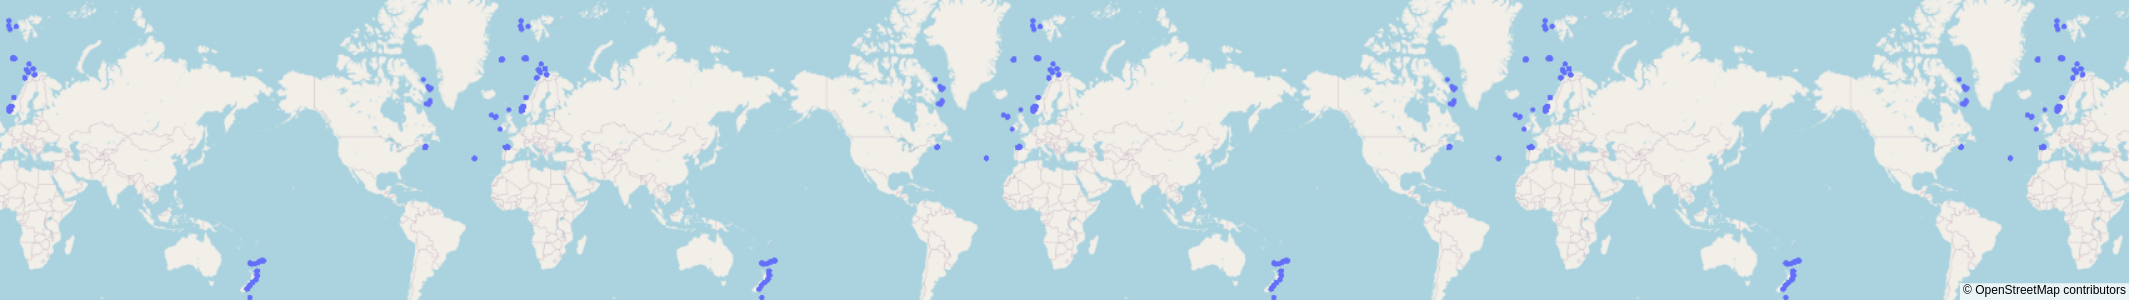

In [168]:
ds = PanDataSet(923033)
get_long_parameters(ds)

# Plot sampling points on interactive plotly map
fig = px.scatter_mapbox(ds.data, lat="LATITUDE", lon="LONGITUDE", 
                        hover_name="Event label", 
                        hover_data=['LATITUDE', 'LONGITUDE', 'DEPTH, water [m]', 'Species', 'Gear'], 
                        zoom=0, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Save data

In [169]:
# Create data directory
data_directory = "PANGAEA_data"
# Check if it already exists before creating it
if not os.path.isdir(data_directory):
    os.mkdir(data_directory)
# Save as csv (comma seperated value)
print(f'PANGAEA dataset {ds.id} saved')
ds.data.to_csv(os.path.join(data_directory, f'PANGAEA_dataset_{ds.id}.csv'),index=False)

PANGAEA dataset 923033 saved


## 4.2 Download multiple datasets

AIM: How can I download multiple datasets right into Python or on my harddrive?

### Perform query

In [170]:
# query database for Thermosalinograph data published from 2020 onwards  

# Get all results and combine them in data frame.
df_all = pd.DataFrame()

# loop over all results in steps of 500
for i in np.arange(0,query.totalcount,500):

    # store result of individual step in qs
    qs = pan.PanQuery("device:thermosalinograph citation:year:202*", limit = 500, offset=i)
    
    # convert qs result with 500 entries to data frame df_qs
    df_qs = pd.DataFrame(qs.result)
    
    # concatenate all individual df_qs into one data frame named query_results_all
    df_all = pd.concat([df_all,df_qs],ignore_index=True)
    
df_all.head(2)

URI      score  \
0  doi:10.1594/PANGAEA.913855  15.187644   
1  doi:10.1594/PANGAEA.932216  15.187644   

                                                html    type  position  
0  <li><div class="citation"><a href="https://doi...  member         0  
1  <li><div class="citation"><a href="https://doi...  member         1

In [171]:
df_all.tail(2)

URI     score  \
221  doi:10.1594/PANGAEA.962688  4.287408   
222  doi:10.1594/PANGAEA.962680  4.275952   

                                                  html    type  position  
221  <li><div class="citation"><a href="https://doi...  member       221  
222  <li><div class="citation"><a href="https://doi...  member       222

### Case 1: Download multiple datasets and treat them as individuals
Note: 
* Data collections and restricted datasets cannot be downloaded

In [172]:
# check whether df_all consists of collections
df_all[df_all['type']=='collection']

Empty DataFrame
Columns: [URI, score, html, type, position]
Index: []

In [173]:
# Create dictionary to store dataframes in
data_dict = {}
# Loop over DOIs and download datasets
#for pangaea_doi in df_all['URI']:
for pangaea_doi in df_all['URI'][0:3]: # loop only over first 3 datasets
    print("".join(40*["-"]))
    print(f'PANGAEA ID: {pangaea_doi}')
    # Cache
    ds = PanDataSet(pangaea_doi, enable_cache=True)
    # Translate to long parameter names
    get_long_parameters(ds)
    print(f'Dataset title: {ds.title}')
    print(ds.data.head(2))
    pangaea_id = pangaea_doi.split('A.')[1]
    data_dict[pangaea_id] = ds.data

----------------------------------------
PANGAEA ID: doi:10.1594/PANGAEA.913855
Dataset title: Surface oceanographic data (TSG) during L'Atalante cruise AT08_4
            DATE/TIME  LATITUDE  LONGITUDE  DEPTH, water [m]  \
0 2008-02-23 08:56:00  16.88863   -24.9979                 5   
1 2008-02-23 08:56:30  16.88863   -24.9979                 5   

   Temperature, water [°C]  Salinity         Event  
0                   21.843     0.225  AT08_4-track  
1                   21.733     0.225  AT08_4-track  
----------------------------------------
PANGAEA ID: doi:10.1594/PANGAEA.932216
Dataset title: Continuous thermosalinograph oceanography along Heincke cruise HE552
            DATE/TIME   LATITUDE  LONGITUDE  DEPTH, water [m]  \
0 2020-07-19 18:35:00  54.174028   7.895433                 4   
1 2020-07-19 18:40:00  54.171576   7.898998                 4   

   Temperature, water [°C]  Salinity               Event  Elevation [m]  
0                  17.8826   31.7349  HE552_0_Underway

In [174]:
list(data_dict)

['913855', '932216', '910965']

In [175]:
data_dict['910965'].head()

DATE/TIME   LATITUDE  LONGITUDE  DEPTH, water [m]  \
0 2019-09-14 09:05:00  53.841924   8.058883                 4   
1 2019-09-14 09:10:00  53.847761   8.041009                 4   
2 2019-09-14 09:15:00  53.853149   8.021944                 4   
3 2019-09-14 09:20:00  53.856509   8.001722                 4   
4 2019-09-14 09:25:00  53.859521   7.980864                 4   

   Temperature, water [°C]  Salinity               Event  Elevation [m]  
0                  17.8907   32.1483  HE541_0_Underway-3          -13.7  
1                  18.0017   32.2146  HE541_0_Underway-3          -13.7  
2                  18.0500   32.2637  HE541_0_Underway-3          -13.7  
3                  18.0862   32.3044  HE541_0_Underway-3          -13.7  
4                  18.1338   32.3595  HE541_0_Underway-3          -13.7

### Save multiple datasets as individuals

In [176]:
# Create data directory
data_directory = "PANGAEA_data"
if not os.path.isdir(data_directory):
    os.mkdir(data_directory)
    
# Loop over each dataset in the dictionary and save to csv
for key, df in data_dict.items():
    print(f'PANGAEA dataset {key} saved')
    # Save to csv
    data_dict[key].to_csv(os.path.join(data_directory, f'PANGAEA_dataset_{key}.csv'),index=False)

PANGAEA dataset 913855 saved
PANGAEA dataset 932216 saved
PANGAEA dataset 910965 saved


### Case 2: Download multiple datasets and combine them in 1 data frame

In [177]:
df_all.head()

URI      score  \
0  doi:10.1594/PANGAEA.913855  15.187644   
1  doi:10.1594/PANGAEA.932216  15.187644   
2  doi:10.1594/PANGAEA.910965  15.187644   
3  doi:10.1594/PANGAEA.910968  15.187644   
4  doi:10.1594/PANGAEA.918071  15.059398   

                                                html    type  position  
0  <li><div class="citation"><a href="https://doi...  member         0  
1  <li><div class="citation"><a href="https://doi...  member         1  
2  <li><div class="citation"><a href="https://doi...  member         2  
3  <li><div class="citation"><a href="https://doi...  member         3  
4  <li><div class="citation"><a href="https://doi...  member         4

In [178]:
# Create one data frame for all datasets
data_all = pd.DataFrame()

# Loop over DOIs and download datasets
#for pangaea_doi in df_all['URI']:
for pangaea_doi in df_all['URI'][0:3]: # loop only over first 3 datasets
    print("".join(40*["-"]))
    print(f'PANGAEA ID: {pangaea_doi}')
    
    # Cache
    ds = PanDataSet(pangaea_doi, enable_cache=True)
    
    # Translate to long parameter names
    get_long_parameters(ds)
    print(f'Dataset title: {ds.title}')
    #print(ds.data.head(2))
    #print(data_all.count())
    data_all = pd.concat([data_all,ds.data])#,ignore_index=True)

----------------------------------------
PANGAEA ID: doi:10.1594/PANGAEA.913855
Dataset title: Surface oceanographic data (TSG) during L'Atalante cruise AT08_4
----------------------------------------
PANGAEA ID: doi:10.1594/PANGAEA.932216
Dataset title: Continuous thermosalinograph oceanography along Heincke cruise HE552
----------------------------------------
PANGAEA ID: doi:10.1594/PANGAEA.910965
Dataset title: Continuous thermosalinograph oceanography along Heincke cruise track HE541


In [179]:
data_all.head(3)

DATE/TIME  LATITUDE  LONGITUDE  DEPTH, water [m]  \
0 2008-02-23 08:56:00  16.88863   -24.9979                 5   
1 2008-02-23 08:56:30  16.88863   -24.9979                 5   
2 2008-02-23 08:57:00  16.88863   -24.9979                 5   

   Temperature, water [°C]  Salinity         Event  Elevation [m]  
0                   21.843     0.225  AT08_4-track            NaN  
1                   21.733     0.225  AT08_4-track            NaN  
2                   21.802     0.225  AT08_4-track            NaN

In [180]:
data_all.tail(3)

DATE/TIME   LATITUDE  LONGITUDE  DEPTH, water [m]  \
2848 2019-09-26 21:00:00  53.868974   7.807669                 4   
2849 2019-09-26 21:05:00  53.867356   7.821808                 4   
2850 2019-09-26 21:10:00  53.865790   7.836166                 4   

      Temperature, water [°C]  Salinity               Event  Elevation [m]  
2848                  16.5721   32.1426  HE541_0_Underway-3          -13.7  
2849                  16.4613   32.0082  HE541_0_Underway-3          -13.7  
2850                  16.4137   31.8833  HE541_0_Underway-3          -13.7

### Save data frame

In [181]:
# Create data directory
data_directory = "PANGAEA_data"
if not os.path.isdir(data_directory):
    os.mkdir(data_directory)
    
data_all.to_csv(os.path.join(data_directory, f'PANGAEA_dataset_all.csv'),index=False)

## 4.3 Quiz

### 4.3.1 Download this dataset and identify the first event name
https://doi.PANGAEA.de/10.1594/PANGAEA.947275

In [206]:
framEvwent=pan.PanQuery('https://doi.PANGAEA.de/10.1594/PANGAEA.947275').result
pd.DataFrame(framEvwent)

print(pd.DataFrame(pan.PanEvent('955825').datetime))

Empty DataFrame
Columns: []
Index: []


### 4.3.2 Download this dataset and identify the number of sampling points >1000m
https://doi.pangaea.de/10.1594/PANGAEA.943624

In [ ]:
# Your solution

### 4.3.3 Was there a sampling point in Australia for this dataset?
https://doi.pangaea.de/10.1594/PANGAEA.943455

In [ ]:
# Your solution

# 5. Download binary files

## 5.1 Download PANGAEA dataset with image data
Dataset: https://doi.pangaea.de/10.1594/PANGAEA.943250

In [188]:
# Download dataset from PANGAEA
pan_id = 943250
ds = PanDataSet(pan_id)
# Spell out abbreviated parameters
get_long_parameters(ds)
df = ds.data.iloc[22:25,:]
df.head(2)

Image           DATE/TIME  LONGITUDE  \
22  HOTKEY_2019_10_01_at_23_15_06_CP4A6694.JPG 2019-10-01 23:15:06  -5.947374   
23  HOTKEY_2019_10_01_at_23_19_28_CP4A6708.JPG 2019-10-01 23:19:28  -5.946048   

     LATITUDE  DEPTH, water [m]                Event  Elevation [m]  
22  82.894183            4023.7  HACON19-24-OFOBS-03        -3930.0  
23  82.894154            4021.7  HACON19-24-OFOBS-03        -3930.0

## 5.2 Download images

In [189]:
# Create data directory
data_directory = "PANGAEA_data"
if not os.path.isdir(data_directory):
    os.mkdir(data_directory)

# Create file urls
df["image_url"] = [f'https://download.pangaea.de/dataset/{pan_id}/files/{img}' for img in df['Image']]
# Download images
for i, file_url in enumerate(df["image_url"]):
    urlretrieve(file_url, os.path.join(data_directory, df["Image"].iloc[i]))
    print(f'{file_url} downloaded')

https://download.pangaea.de/dataset/943250/files/HOTKEY_2019_10_01_at_23_15_06_CP4A6694.JPG downloaded
https://download.pangaea.de/dataset/943250/files/HOTKEY_2019_10_01_at_23_19_28_CP4A6708.JPG downloaded
https://download.pangaea.de/dataset/943250/files/HOTKEY_2019_10_01_at_23_20_11_CP4A6711.JPG downloaded
